In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

In [4]:
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = html_soup.find_all('tr', class_="data-row")

In [6]:
list_of_rows = []
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)

In [7]:
df = pd.DataFrame(list_of_rows, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [8]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


id: The identification number of a single transmission<br>
terrestrial_date: The date on Earth <br>
sol: The number of elapsed sols (Martian days) since Curiosity landed on Mars. <br>
ls: The solar longitude. <br>
month: The Martian month. <br>
min_temp: The minimum temperature, in Celsius, of a single Martian day (sol). <br>
pressure: The atmospheric pressure in Curiosity's location.

In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [11]:
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# How many months are there on Mars?
df["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# How many Martian days' worth of data are there?
df.sol.nunique()

1867

In [14]:
# What is the average low temperature by month?
min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


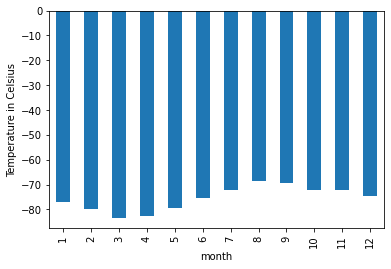

In [15]:
# Plot the average temperature by month
min_temp_by_month.plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()

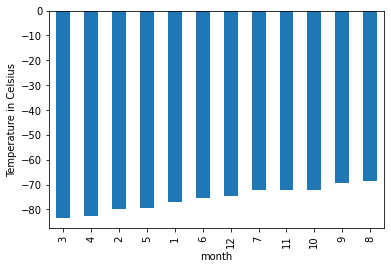

In [16]:
# Identify the coldest and hottest months in Curiosity's location
min_temp_by_month.sort_values().plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()

In [17]:
# Average pressure by Martian month
pressure_by_month = df.groupby('month')['pressure'].mean()
print(pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


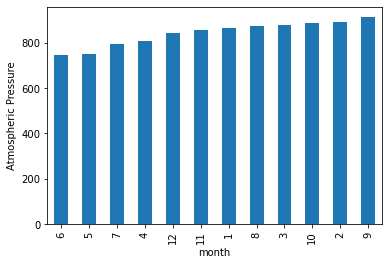

In [18]:
pressure_by_month.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()

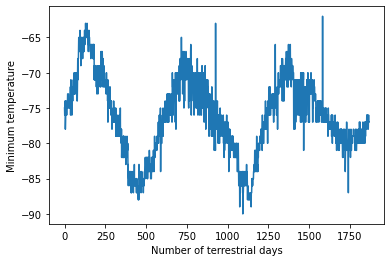

In [19]:
# How many terrestrial (earth) days are there in a Martian year?
df.min_temp.plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [20]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [21]:
browser.quit()